<a href="https://colab.research.google.com/github/PacTal/Doctoral-thesis/blob/main/Model/ModeloPhD_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulation
Title thesis: A computational model for the evolution of learning physical micro-contents in peer instruction methodology

Author: Paco H. Talero L.

Thesis supervisor: Dr. César Mora Ley IPN, centro de Investigación en Ciencia Aplicada y Tecnología Avanzada, Unidad Legaria

Doctorado en Ciencias en Física Educativa.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas as pd

# Functions

## Combinations without repeats

In [3]:
def combinations_without_repeats(n): # Number of student (n) is even
    lst=range(n)
    pairs = []
    Index = np.random.permutation(len(lst)) #This line does the permutation of the indexes of the student list (student system)
    for i in range(0, len(lst), 2): #--0,2,4,6,8...n-1
        pair = [lst[Index[i]], lst[Index[i+1]]] #--Make classmates
        pairs.append(pair) #--In this line is make the list of classmates
    return pairs
#--
print(len(combinations_without_repeats(12)))
combinations_without_repeats(12)

6


[[1, 6], [9, 8], [4, 0], [11, 7], [5, 10], [2, 3]]

## Decreasing elements

In [4]:
def is_increasing(lst):   #--Does the list have elements in descending order?
  cont=0
  for i in range(len(lst) - 1):
    if lst[i] >= lst[i + 1]:
      cont+=1
  if cont==len(lst)-1:return True
  else: return False
#---

## Concentración

C= 1.0


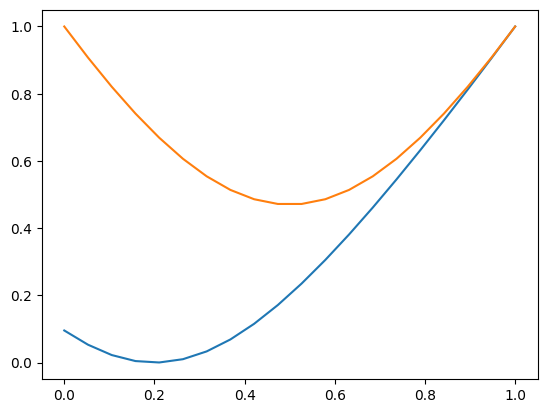

In [5]:
R=[10,0,0,0,0]
Ne=10
def C(Ne,R):
  sum_op,m=0,len(R)
  for i in range(m):
    sum_op=sum_op+R[i]**2
  c= (np.sqrt(m)/(np.sqrt(m)-1))*(np.sqrt(sum_op)/Ne -1/np.sqrt(m))
  return c
#---
print("C=",round(C(10,R),3))
#----Cmin y Cmáx
def cmM(u,Ne,R):
  m=len(R)
  c_min=(np.sqrt(m)/(np.sqrt(m)-1))*(np.sqrt( (1-u)**2/(m-1)+u**2) -1/np.sqrt(m))
  c_max=(np.sqrt(m)/(np.sqrt(m)-1))*(  np.sqrt(u**2+(1-u)**2) -1/np.sqrt(m)  )
  return c_min,c_max
#--Table
u=np.linspace(0,1,20) #--lista lineal
c_m,c_M=[],[]
for x in u:
  c_m.append(cmM(x,Ne,R)[0])
  c_M.append(cmM(x,Ne,R)[1])
#-----
plt.plot(u,c_m)
plt.plot(u,c_M)
plt.show()

# A student

In [6]:
import numpy as np
class student:
    def __init__(self,M,N,po):
      self.M=M #number of levels M, rows
      self.N=N #number of attributes N, columns
      self.po=po #initial knowledge, ability to discern
      self._m =0.5 #slope of the linear growth function of the attribute
      self._b=0.5  #point of the linear growth function of the attribute
      self.s=np.zeros((M,N))# occupancy state, is filled with zeros
      self.v=np.zeros((M,N))# values matrix, increments by _m each column
      self.M_score=np.zeros((M,N))# score matrix
      #---
      for j in range(self.N):     # We are filling the state of occupation matrix, in accordance
        i=np.random.randint(0, self.M) # with po, in each attribute there is only one occupied level.
        r_n=np.random.random()
        if r_n<=po:
          self.s[i][j]=1
      #--We assign a value according to the difficulty of the attribute and the level
      for j in range(self.N):          # We are filling the value matrix, in
        for i in range(self.M):        # accordance with according to _ m and _b.
          self.v[i][j]=self._m*(j+1)+i+self._b

    #--The methods
    #--calculate score or discernment
    def score(self):
      sum_s,smax=0,0
      for j in range(self.N):
        smax=smax+self.v[self.M-1][j]
      #---
      for i in range(self.M):
        for j in range(self.N):
          self.M_score[i][j]=self.s[i][j]*self.v[i][j] #Multiplies the values in array
          sum_s=sum_s+self.M_score[i][j]  #a by the values in array value and adds all values
      return sum_s/smax # 10.5
      #----
    def change(self,q,F,occupy): # We are filling the state matrix from the outside.
      self.s[q][F]=occupy
    #---
    def VER(self):  # We can see the state matrix and the value matrix.
      return self.s,self.v
#---End of Studt class

# System metrics

1. Clean state.
2. Outliers state.
3. Linear learning State.
4. Nonlinear learning State.

In addition, we have three indicators that quantify the evolution of learning, they are the discernment $D$,  occupation index $Ω$ ,  and the score, $s$.



# Evolution


In [7]:
#---Global parameters
N=3    #--N the conceptual attributes
M=3    #--M are of level
po=0.8 #---initial background
p_mt=0.8  # Instructional quality
n=20 #Number of students is a even number
number_of_lessons=11
s_sys=[]
for k in range(n):
  s_sys.append(student(M,N,po))
SystemS=s_sys #--Fixed student system

# Sampling

Discernment Index= 0.5857142857142857
Clean states= 0
Highest discernment state= 1
Linear and nonlinear= 7
states of learning 12
s= 0.05
c= 0.39283882771841183
ocupacion_stado_sistema= 0.8


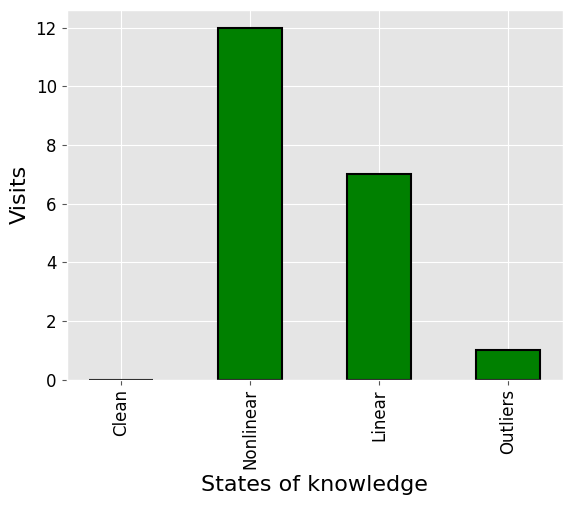

In [8]:
class samplig:
    def __init__(self,SystemS):
      self.SystemS=SystemS #
      self.n=len(SystemS)
    #--Discernment Index
    def D(self):
      sumaD=0
      for k in range(self.n):
        sumaD=sumaD+self.SystemS[k].score()
      return sumaD/self.n
    #--Clean state
    def Clean_States(self):
      cleanS=0
      for k in range(self.n):
        if self.SystemS[k].score()==0:
          cleanS=cleanS+1
      return cleanS
    #---Highest discernment state
    def OutlierS_States(self):
      Hd_S=0
      for k in range(self.n):
        if np.sum(self.SystemS[k].VER()[0][M-1])==N:
          Hd_S=Hd_S+1
      return Hd_S
    #---Linear and nonlinear states of learning
    def L_nl_states(self):
      l_st,nl_st=0,0
      for k in range(self.n):
        if self.SystemS[k].score()!=0 and np.sum(self.SystemS[k].VER()[0][M-1])!=N:
          stz=self.SystemS[k].VER()[0].T
          idx=[]
          for j in range(N):
            ztz=list(stz[j])
            if 1 in ztz:
              id=ztz.index(1)
              idx.append(id)
            else:idx.append(-1)
          if is_increasing(idx)==True:
            l_st+=1
          else:nl_st+=1
      return l_st,nl_st
    #----score and concentration
    def s_c(self):
      Ne=self.n
      Visits=[self.Clean_States(),self.L_nl_states()[1],self.L_nl_states()[0],self.OutlierS_States()]
      Concentration=C(Ne,Visits)
      ScoRe=self.OutlierS_States()/Ne
      return ScoRe,Concentration
     #--System microcontent
    def SysMic(self):
      grupS=student(M,N,0)#---Group of students as empty table
      matrix_occupation=np.zeros((M,N))# score matrix
      for k in range(self.n):
        matrix_occupation+=self.SystemS[k].VER()[0]
      #matrix_occupation=matrix_occupation/(self.n*N)
      for i in range(M):
        for j in range(N):
          NewV=matrix_occupation[i][j]
          grupS.change(i,j,NewV)
      return grupS,np.sum(matrix_occupation/(self.n*N))
     #----Histogram
    def Show_Histogram(self):
       Visits=[self.Clean_States(),self.L_nl_states()[1],self.L_nl_states()[0],self.OutlierS_States()]
       Learnig_states=['Clean','Nonlinear','Linear','Outliers']
       plt.style.use('ggplot')
       plt.figure(edgecolor='red') #navy,gray edgecolor facecolor='gray'
       plt.bar(Learnig_states,Visits,color='green',width=0.5,align='center',edgecolor='black',linewidth=1.5)
       plt.ylabel('Visits',fontsize=16,color='black')
       plt.xlabel('States of knowledge',fontsize=16,color='black')
       plt.grid(True)
       plt.xticks(rotation=90,color='black',fontsize=12)
       plt.yticks(color='black',fontsize=12)
       #plt.title("Histogram of visits", color='black')
       plt.show()
#-*_*_*_*_*_*_*_*_*_*_*_*_*_* Performance
fis1=samplig(SystemS)
print("Discernment Index=",fis1.D())
print("Clean states=",fis1.Clean_States())
print("Highest discernment state=",fis1.OutlierS_States())
print("Linear and nonlinear=",fis1.L_nl_states()[0])
print("states of learning",fis1.L_nl_states()[1])
print("s=",fis1.s_c()[0])
print("c=",fis1.s_c()[1])
#print("stado_sistema=",fis1.SysMic()[0])
print("ocupacion_stado_sistema=",fis1.SysMic()[1])
fis1.Show_Histogram()

# Microcontent status

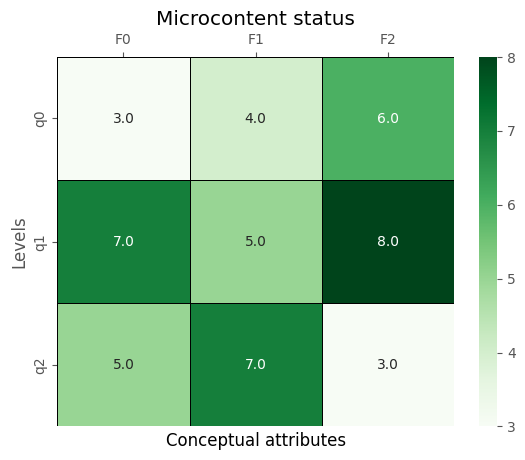

In [9]:
Laura=student(3,4,0.7) #--A particular student
def Microcontent(Laura):
  number_of_levels=len(Laura.VER()[0])#--Number of levels, rows
  n_C_a=len(Laura.VER()[0][0])        #--Number of conceptual attributes,columns
  #---
  LeveS,AttributeS=[],[]
  for i in range(number_of_levels):  #--M
    a='q'+str(i)
    LeveS.append(a)
  for j in range(n_C_a):    #--N
    b='F'+str(j)
    AttributeS.append(b)
  #---
  Data={}
  for r in range(len(AttributeS)):
    Data[AttributeS[r]]=Laura.VER()[0].T[r]
  #----
  df = pd.DataFrame(Data, index=LeveS) # Convert dictionary to Pandas DataFrame
  #---The heatmap
  ax = sns.heatmap(df, annot=True,fmt='.1f', cmap='Greens',linewidth=0.5,linecolor='black')
  ax.xaxis.tick_top() # Move x-axis labels to top
  plt.title("Microcontent status")
  plt.xlabel("Conceptual attributes",color='black')
  plt.ylabel("Levels")
  plt.show()
#-**_*_*_*_*
Microcontent(fis1.SysMic()[0])

# Peer Interaction
### Similarity and transition
Let $n_c$ be the number of conceptual attributes that the two students share and $N$ be the number of conceptual attributes, then the learning (or confusion) process occurs with probability $p_l$.
### Classification of states
The estates are: clean, nonlinear, linear, outliers.
### Copy
### Exchange

In [10]:
class peer_instruction:
  def __init__(self,SystemS):
    self.SystemS=SystemS #
    self.n=len(SystemS)
  #--This function calculates nc and pA
  def transfer_probability(self,r,s):  #--- They are two r,s wiht r<s
    nc=0
    for i in range(M):
      for j in range(N):
        if self.SystemS[r].VER()[0][i][j]==1 and self.SystemS[s].VER()[0][i][j]==1:
          nc=nc+1
    pl=nc/N
    return pl
  # Classification of states
  def ClassState(self,r):
    #possible_states=0'clean',1'nonlinear',2'linear',3'outliers'
    if self.SystemS[r].score()==0: m_state=0
    else:
      if np.sum(self.SystemS[r].VER()[0][M-1])==N: m_state=3
      else:
        stz1=self.SystemS[r].VER()[0].T
        idx1=[]
        for j in range(N):
          ztz1=list(stz1[j])
          if 1 in ztz1:
            id1=ztz1.index(1)
            idx1.append(id1)
          else:
            idx1.append(-1)
        if is_increasing(idx1)==True:
          m_state=2
        else:
          m_state=1
    return m_state
  #--left (--r--) copy right (--s--) only used inside function Exchange---
  def copy(self,r,s):
    ab=[]
    for i in range(M):
      for j in range(N):
        if self.SystemS[r].VER()[0][i][j]!= self.SystemS[s].VER()[0][i][j]:
          ab.append((i,j))
    #----
    if ab==[]:
      Ar=self.SystemS[r]
    else:
      if len(ab)==1:
        qi,Fj=ab[0][0],ab[0][1]
        self.SystemS[r].change(qi,Fj,self.SystemS[s].VER()[0][qi][Fj])
        for i in range(M):
          if i!=qi:
            self.SystemS[r].change(i,Fj,0)
        Ar=self.SystemS[r]
      else:
        IndX=np.random.randint(0,len(ab)-1)
        qi,Fj=ab[IndX][0],ab[IndX][1]
        self.SystemS[r].change(qi,Fj,self.SystemS[s].VER()[0][qi][Fj])
        for i in range(M):
          if i!=qi:
            self.SystemS[r].change(i,Fj,0)
        Ar=self.SystemS[r]
    return Ar
  #----Exchange---
  def exchange(self,r,s):
    new_r,new_s=self.SystemS[r],self.SystemS[s]
    r_c=self.ClassState(r)
    s_c=self.ClassState(s) #--student status
    #If the students are completely different or completely the same, they do not interact.
    p_l=self.transfer_probability(r,s)
    if 0.0<p_l<1.0:
      #-----
      if r_c<s_c:     #--In the work they are L(A) and L(B)
        if p_l>=0.5:pc=p_l
        else: pc=1.-p_l
        if np.random.random()<pc:
          self.SystemS[r]=self.copy(r,s) #--Loser is r, r copy to s
        else:
          self.SystemS[s]=self.copy(s,r) #--winner is s, s copy to r the loser
      #--------
      elif r_c>s_c:
        if p_l>=0.5:pc=p_l
        else: pc=1.-p_l
        if np.random.random()<pc:
          self.SystemS[s]=self.copy(s,r) #--Loser is s, s copy to r
        else:
          self.SystemS[r]=self.copy(r,s) #--winner is r, r copy to s the loser
      #----
      elif r_c==s_c:
        if np.random.random()<0.5:
          self.SystemS[r]=self.copy(r,s) #--Loser is r, r copy to s
        else:
          self.SystemS[s]=self.copy(s,r) #--Loser is s, s copy to r
      #----------
#----
r,s=0,1
Sara_antes=SystemS[r].VER()[0]
Alice_antes=SystemS[s].VER()[0]

print("Sara antes\n",Sara_antes)
print("Alice antes\n",Alice_antes)
biologia=peer_instruction(SystemS)
print("microestado de r=",biologia.ClassState(r))
print("microestado de s=",biologia.ClassState(s))
print("pl=",biologia.transfer_probability(r,s))
#--Ejecutar
biologia.exchange(r,s)
Sara_despues=SystemS[r].VER()[0]
Alice_despues=SystemS[s].VER()[0]
print("Sara_despues\n",Sara_despues)
print("Alice_despues\n",Alice_despues)


Sara antes
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
Alice antes
 [[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
microestado de r= 1
microestado de s= 1
pl= 0.0
Sara_despues
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
Alice_despues
 [[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


# Interaction with the instructor

In [11]:
#---redefinition
def Int_Inst(r):
  if np.random.random()<p_mt: #--If the instruction is appropriate, the student learns
    columnj=[]
    if SystemS[r].score()!=0:
      for j in range(N):
        if SystemS[r].VER()[0][M-1][j]!=1:
          list_j_column=list(SystemS[r].VER()[0].T[j])
          list_sum = sum(list_j_column) #sums the elements of the j column, must be 0 or 1
          if list_sum!=0:
            columnj.append(j)
      if columnj!=[]:
        min_columj = min(columnj) #chosen column number
        list_i_row=list(SystemS[r].VER()[0].T[min_columj])
        ind_row=list_i_row.index(1)
        #-----we make the exchange
        SystemS[r].change(ind_row,min_columj,0)
        SystemS[r].change(ind_row+1,min_columj,1)
      else:
        for j in range(N):
          list_j_column2=list(SystemS[r].VER()[0].T[j])
          list_sum2 = sum(list_j_column2) #sums the elements of the j column, must be 0 or 1
          if list_sum2==0:
            SystemS[r].change(0,j,1)
            break
    else:
      SystemS[r].change(0,0,1)
#----
r=0
Sara_antes=SystemS[r].VER()[0]
print("Sara antes\n",Sara_antes)
Int_Inst(r)
Sara_d=SystemS[r].VER()[0]
print("Sara_después\n",Sara_d)

Sara antes
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
Sara_después
 [[0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]]


# The student system

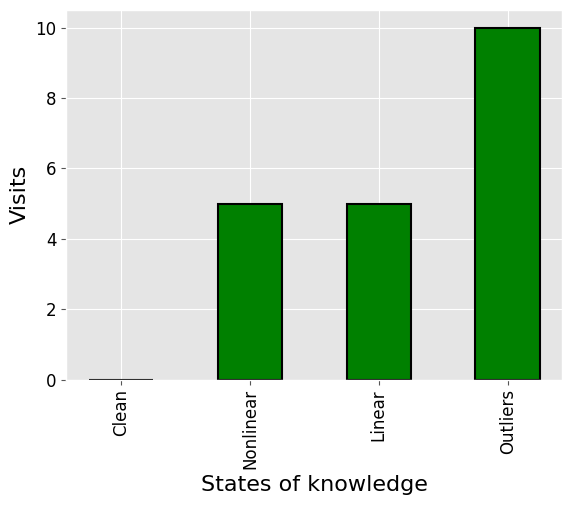

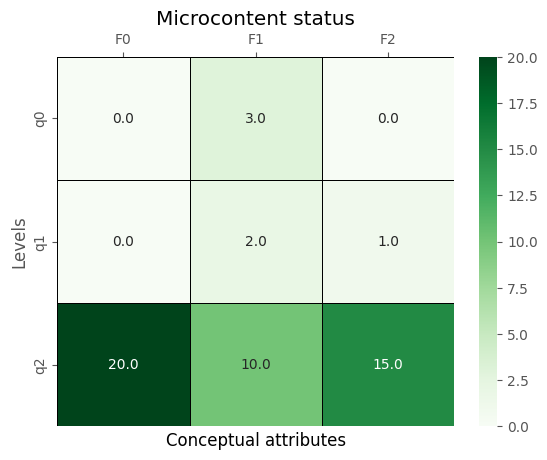

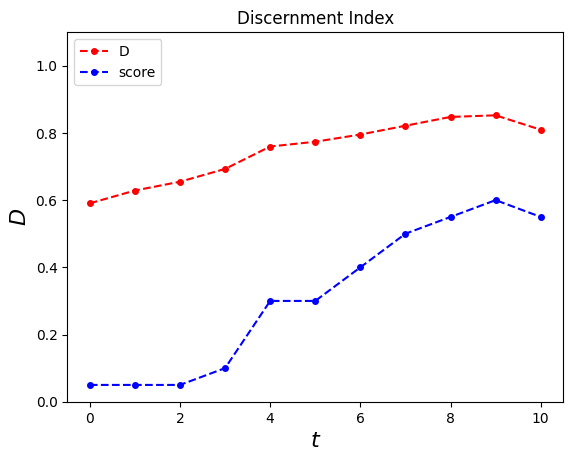

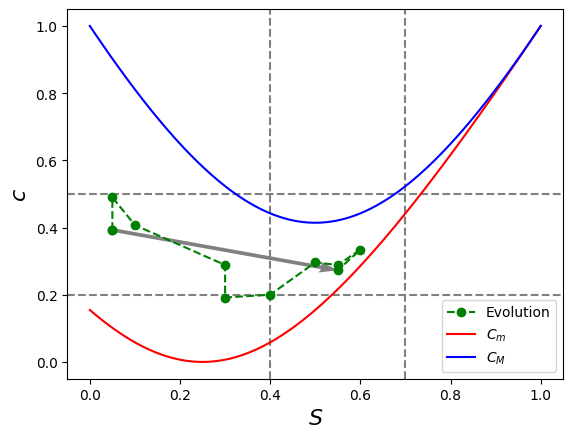

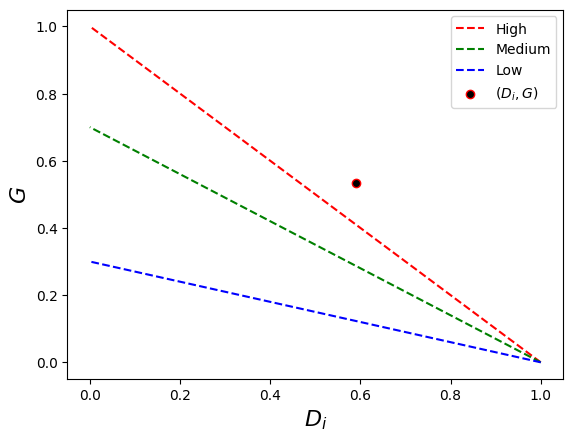

In [12]:
fis1=samplig(SystemS)
Fis=peer_instruction(SystemS)#--system
lectures,discernment,sCr,coc=[],[],[],[]
for nl in range(number_of_lessons):
  sCr.append(fis1.s_c()[0])
  coc.append(fis1.s_c()[1])
  lectures.append(nl)
  discernment.append(fis1.D())
  #-peer instruction
  couples=combinations_without_repeats(n)
  for n_collisions in couples:
    r,s=n_collisions[0],n_collisions[1]
    Fis.exchange(r,s) #--Peer Instruction
    Int_Inst(r)       #--Interaction with the instructor
#----
fis1.Show_Histogram()
Microcontent(fis1.SysMic()[0])
#---
#--Table
u=np.linspace(0,1,100) #--lista lineal
R=[fis1.Clean_States(),fis1.L_nl_states()[1],fis1.L_nl_states()[0],fis1.OutlierS_States()]
c_m,c_M=[],[]
for x in u:
  c_m.append(cmM(x,n,R)[0])
  c_M.append(cmM(x,n,R)[1])

#plt.style.use('ggplot')
plt.style.use('default')
plt.plot(lectures,discernment,'o--',color="red",markersize=4, alpha=1.0,label='D')
plt.plot(lectures,sCr,'o--',color="blue",markersize=4, alpha=1.0,label='score')
plt.grid(False)
plt.legend(loc='upper left')  #---lower center, lower right, upper left
plt.ylabel('$D$',fontsize=16)
plt.xlabel('$t$',fontsize=16)
plt.ylim(0, 1.1)
plt.title('Discernment Index')
#plt.axis('equal')
plt.show()
#---
xoo,yoo=sCr[0],coc[0]
xff,yff=sCr[-1]-sCr[0],coc[-1]-coc[0]
#-----
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axvline(x=0.4, color='grey', linestyle='--')
plt.axvline(x=0.7, color='grey', linestyle='--')
plt.quiver(xoo,yoo,xff,yff, angles='xy', scale_units='xy', scale=1, color='gray',
          linestyle='dashed',linewidth=2)
plt.plot(sCr,coc,'o--',color="green",label='Evolution')
plt.plot(u,c_m,color="red",label='$C_m$')
plt.plot(u,c_M,color="blue",label='$C_M$')
plt.grid(False)
plt.legend(loc='lower right')  #---lower center, lower right, upper left
plt.ylabel('$c$',fontsize=16)
plt.xlabel('$S$',fontsize=16)
#plt.title('Discernment Index') #'Bruce Centenary',
#plt.axis('equal')
plt.show()
#-----Hacke gain---
x1, y1 = 1., 0.
x2, y2 = 0., 1.
#-------
xm1, ym1 = 1., 0.
xm2, ym2 = 0., 0.7
#-------
xb1, yb1 = 1., 0.
xb2, yb2 = 0., 0.3
#-----G vs D
Gf=(discernment[-1]-discernment[0])/(1.-discernment[0])
xoD=discernment[0]

#---
fig, ax = plt.subplots()
ax.set_facecolor('white')
ax.plot([x1, x2], [y1, y2],'--',color='red',label='High')
ax.plot([xm1, xm2], [ym1, ym2],'--', color='green',label='Medium')
ax.plot([xb1, xb2], [yb1, yb2],'--', color='blue',label='Low')
ax.grid(False)  #--False
#ax.quiver(xoD,yoG,xfD,yfG, angles='xy', scale_units='xy', scale=1, color='black', headlength=3.5)
ax.scatter(xoD, Gf,facecolor='black', edgecolor='red', label='$(D_i,G)$')
ax.legend(loc='upper right')  #---lower center, lower right, upper left
ax.set_ylabel('$G$',fontsize=16)
ax.set_xlabel('$D_i$',fontsize=16)
plt.show()
#-----




<ipython-input-13-fae2699f6689>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo--" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(values_pm,sCoRE,'bo--',color=colori[kc],markersize=3, alpha=1.0,label= '$p_o=$%0.1f' % po)
<ipython-input-13-fae2699f6689>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo--" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(values_pm,dis,'bo--',color=colori[kc],markersize=3, alpha=1.0,label= '%0.1f' % po)
<ipython-input-13-fae2699f6689>:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax3.plot(dis,sCoRE,'bo',color=colori[kc],markersize=3, alpha=1.0,label= '%0.1f' % po)


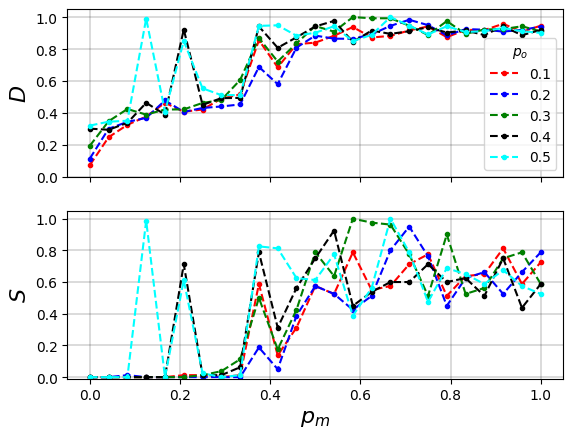

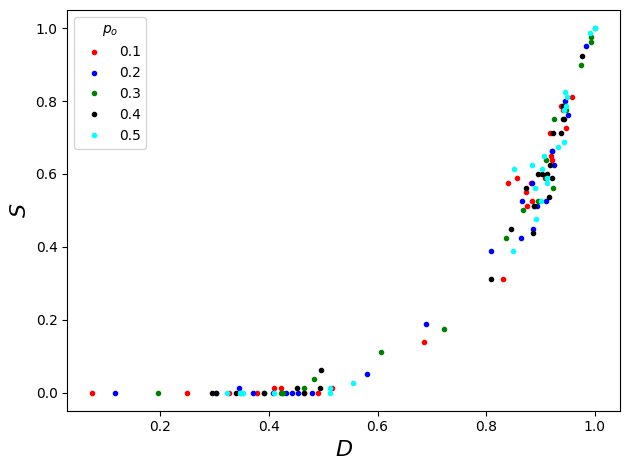

In [13]:
N=3    #--N the conceptual attributes
M=3    #--M are of level
po=0.4 #---initial background
n=80 #Number of students
number_of_lessons=100 #---16 questions/weeks, time of instruction apx 5 weeks
s_sys=[]
for k in range(n):
  s_sys.append(student(M,N,po))
SystemS=s_sys #--Fixed student system
def phase_change(p_mt):
  for nl in range(number_of_lessons): #-peer instruction
    couples=combinations_without_repeats(n)
    for n_collisions in couples:
      r,s=n_collisions[0],n_collisions[1] #interaction between students
      Fis.exchange(r,s) #--
      Int_Inst(r)       #--Interaction with the instructor
  return fis1.OutlierS_States()/n,fis1.D()
#-------Graphs
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig1, (ax3) = plt.subplots(1, 1)
#---list of instruction level
colori=['red','blue','green','black','cyan','magenta']
kc=0
level_instruction=[0.1,0.2,0.3,0.4,0.5] #,0.4,0.5,0.6 [0.05,0.1,0.15] [0.1,0.2,0.3,0.4,0.5,0.6]
values_pm=np.linspace(0.,1., num=25, endpoint=True) #--50
for l in level_instruction:
  po=l
  sCoRE,dis=[],[]
  for p_mt in values_pm:
    s_sys=[]
    for k in range(n):
      s_sys.append(student(M,N,po))
    SystemS=s_sys #--Fixed student system
    fis1=samplig(SystemS)
    Fis=peer_instruction(SystemS)#--system
    orchestrare,discern=phase_change(p_mt) #score, dicern
    sCoRE.append(orchestrare)
    dis.append(discern)
  ax2.plot(values_pm,sCoRE,'bo--',color=colori[kc],markersize=3, alpha=1.0,label= '$p_o=$%0.1f' % po)
  ax1.plot(values_pm,dis,'bo--',color=colori[kc],markersize=3, alpha=1.0,label= '%0.1f' % po)
  #plt.plot(values_pm,sCoRE,'bo--',color=colori[kc],markersize=4, alpha=1.0,label= '$p_o=$%0.2f' % po)
  #plt.plot(values_pm,dis,'bo--',color=colori[kc+1],markersize=3, alpha=1.0,label= '$p_o=$%0.2f' % po)
  ax3.plot(dis,sCoRE,'bo',color=colori[kc],markersize=3, alpha=1.0,label= '%0.1f' % po)
  kc+=1
#--------------
ax3.grid(False)
#plt.legend(title='$p_o$',loc='upper left')  #---lower center, lower right, upper left
ax3.set_ylabel('$S$',fontsize=16)
#plt.ylabel('$D-S$',fontsize=16)
#plt.xlabel('$p_m$',fontsize=16)
ax3.set_xlabel('$D$',fontsize=16)
ax3.legend(title='$p_o$',loc='upper left')  #---lower center, lower right, upper left
#plt.title('Phase change') #'Bruce Centenary',
#plt.ylim(-0.05, 1.05)
#plt.show()

#------


# Plot the first graph on the first subplot
#ax1.set_xlabel('$p_m$',fontsize=16)
ax2.grid(True , which='both', axis='both', color='black', linewidth=0.2, linestyle='-')
ax2.set_ylabel('$S$',fontsize=16)
ax2.set_ylim(-0.01, 1.05)
#ax1.set_title('')

# Plot the second graph on the second subplot
ax1.grid(True , which='both', axis='both', color='black', linewidth=0.2, linestyle='-')
ax2.set_xlabel('$p_m$',fontsize=16)
ax1.set_ylabel('$D$',fontsize=16)
ax1.legend(title='$p_o$',loc='lower right')  #---lower center, lower right, upper left
ax1.set_ylim(0, 1.05)
#ax1.legend(title='$p_o$',  loc='upper left') #bbox_to_anchor=(1.05, 1),
#ax2.set_title('Graph 2')

# Remove the left spine of the original y-axis
#ax2.yaxis.set_visible(False)
# Adjust the layout and spacing
plt.tight_layout()
plt.show()

# Monte Carlo
Evolution in the time.

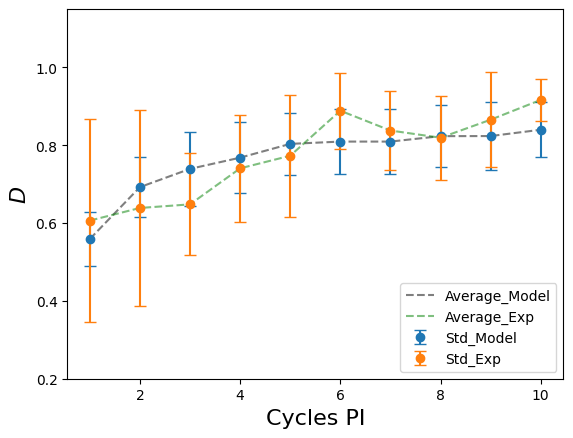

In [14]:
df,df_S = pd.DataFrame(),pd.DataFrame()
#--time
lectures2,sCr2=[],[]
N_sampling=50 #--Number of samples in the Montecarlo system
#---
M=4    #--M are of level, rows
N=3    #--N the conceptual attributes, columns
po=0.5 #---initial background
p_mt=0.93
n=16 #Number of students
number_of_lessons=10 #---cycles PI
#---
for i in range(N_sampling):
  discernment2,sCr2=[],[]
  #-------Reboot the system
  s_sys=[]
  for k in range(n):
    s_sys.append(student(M,N,po))
    SystemS=s_sys #--Fixed student system
#---xxxxxxxxxxxxxxxxxx--------------xxxxxxxxxxxxxxxxxxxxx--------------
  fis2=samplig(SystemS)
  Fis2=peer_instruction(SystemS)#--system
  #---
  for nl in range(number_of_lessons+1):
    sCr2.append(fis2.s_c()[0])
    discernment2.append(fis2.D())#--
    lectures2.append(nl)
    #-peer instruction
    for k in range(8):  #---quality of cognitive confrontation amplificator
      couples=combinations_without_repeats(n)
      for n_collisions in couples:
        r,s=n_collisions[0],n_collisions[1]
        Fis2.exchange(r,s) #--Peer Instruction
        Int_Inst(r)
  #---Dataframe
  column_name = f'D{i+1}'
  column_data = [i, i+1]
  # Asignar los valores a las columnas correspondientes
  df.loc[:, column_name] = discernment2
  df_S.loc[:, column_name] = sCr2
#----
# calculate the mean and standard deviation of each row
row_means = df.mean(axis=1)
row_stds = df.std(axis=1)
#--
row_means_S = df_S.mean(axis=1)
row_stds_S = df_S.std(axis=1)
# add the mean and standard deviation as new columns
df['Mean'] = row_means
df['Std'] = row_stds
df.reset_index(level=0, inplace=True)
#--
df_S['Mean_S'] = row_means_S
df_S['Std_S'] = row_stds_S
df_S.reset_index(level=0, inplace=True)

#----------
Delta=1
indices_to_keep = list(range(1,number_of_lessons+Delta, Delta))
# Select the desired rows using boolean indexing
reduced_df = df[df.index.isin(indices_to_keep)]
df=reduced_df
#--
reduced_df_S= df_S[df_S.index.isin(indices_to_keep)]
df_S=reduced_df_S
#-------------Experimental
row_list_average=[0.6064814814814815,0.6388888888888888,0.6481481481481481,0.7407407407407407,0.7731481481481481,0.888888888888889,0.837962962962963,0.8194444444444444,0.8657407407407407,0.9166666666666667]
row_list_std=[0.2607979033861433,0.2510153136763686,0.13112017824544941,0.13791842018537226,0.15647874203168596,0.09752305016361233,0.10199204717196483,0.10808640212647301,0.12162217086647249,0.05324409543913043]

#---
plt.style.use('default')
plt.figure(edgecolor='red') #navy,gray edgecolor facecolor='gray'

plt.errorbar(df['index'],df['Mean'], yerr=df['Std'],fmt='o', capsize=4 ,linestyle='none',label='Std_Model')
plt.plot(df['index'],df['Mean'],'--',color="black",markersize=4, alpha=0.5,label='Average_Model')

plt.errorbar(x=df['index'],y=row_list_average, yerr=row_list_std,fmt='o', capsize=4,linestyle='none',label='Std_Exp')
plt.plot(df['index'],row_list_average,'--',color="green",markersize=4, alpha=0.5,label='Average_Exp')

plt.grid(False)
plt.legend(loc='lower right')  #---lower center, lower right, upper left
plt.ylabel('$D$',fontsize=16)
plt.xlabel('Cycles PI',fontsize=16)
plt.ylim(0.2, 1.15)
plt.show()
#--------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



In [15]:
spr=row_list_average
teo=df['Mean'].tolist()
def v_True(spr,teo):
  v=0.0
  for k in range(len(spr)):
    e_relative=np.abs((spr[k]-teo[k])/teo[k])
    v=v+(1-e_relative)
  v=v/len(spr)
  return v
print("Truth value=",round(v_True(spr,teo),2))


Truth value= 0.94
